# 0. Setup

In [2]:
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append("..")

import arcadia_pycolor as apc

apc.mpl.setup()

# 1. Stacked bar chart with `matplotlib`

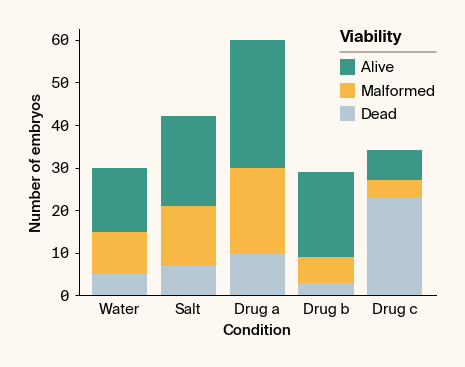

In [40]:
categories = ["Water", "Salt", "Drug A", "Drug B", "Drug C"]
subcategories = ["Dead", "Malformed", "Alive"]
data = np.array(
    [
        [5, 10, 15],
        [7, 14, 21],
        [10, 20, 30],
        [3, 6, 20],
        [23, 4, 7],
    ]
)

fig, ax = plt.subplots()

# Initialize the bottom array to 0
bottom = np.zeros(len(categories))

colors = [apc.denim, apc.canary, apc.seaweed]

# Loop through each subcategory and plot
for i in range(len(subcategories)):
    ax.bar(categories, data[:, i], bottom=bottom, label=subcategories[i], color=colors[i])
    bottom += data[:, i]

ax.set_xlabel("Condition")
ax.set_ylabel("Number of embryos")

legend = ax.legend()
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))
ax.get_legend().set_title("Viability")

apc.mpl.style_axis(ax, categorical_axes="x", monospaced_axes="y")

# Show the plot
plt.show()